In [ ]:
!pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00


# Modelling Leaky Integrate-and-Fire (LIF) Neuron with presynaptic firing @10hz

WARNING    The object 'neurongroup_2' is getting deleted, but was never included in a network. This probably means that you did not store the object reference in a variable, or that the variable was not used to construct the network.
The object was created here (most recent call only):
  File '<ipython-input-6-8bd61c35f0c7>', line 19, in <cell line: 0>
    neuron = NeuronGroup(1, eqs, threshold='v >= 30', reset='v = c; u += d', method='euler') [brian2.core.base.unused_brian_object]


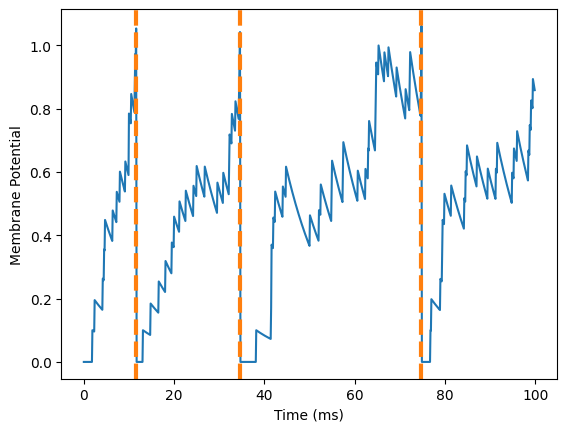

In [ ]:
from brian2 import *

start_scope()
# Poisson spiking neurons
P = PoissonGroup(100, rates=10*Hz)

# LIF neuron
eqs = '''
dV/dt = -V / tau : 1
tau : second
'''
G = NeuronGroup(1, eqs, threshold='V > 1', reset='V = 0', method='exact')
G.tau = 10*ms


S = Synapses(P, G, on_pre='V += 0.1')
S.connect()

# run
M = StateMonitor(G, 'V', record=True)
Sp = SpikeMonitor(G)
run(100*ms)

# Plot
plot(M.t/ms, M.V[0])
for t in Sp.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('Membrane Potential')
show()

# Creating Single Izhikevich Neuron
Stimuli 1: Constant Current

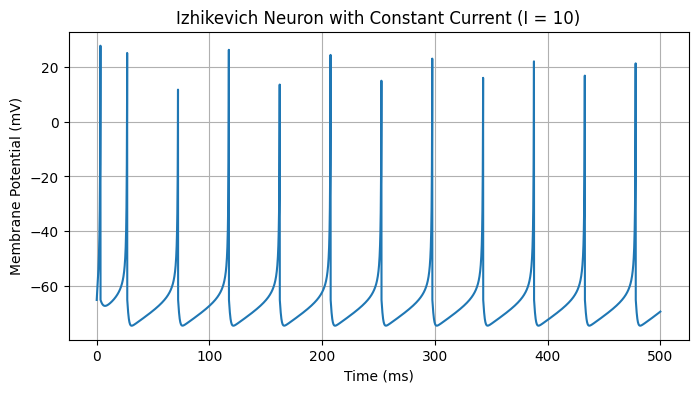

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()
defaultclock.dt = 0.1*ms

# Izhikevich neuron model equations
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I) / ms : 1
du/dt = a * (b * v - u) / ms : 1
I : 1  # Input current (will be set differently for each stimulus)
a : 1
b : 1
c : 1
d : 1
'''

# Create a single neuron
neuron = NeuronGroup(1, eqs, threshold='v >= 30', reset='v = c; u += d', method='euler')
neuron.a = 0.02  # Time scale of recovery variable
neuron.b = 0.2   # Sensitivity of recovery variable
neuron.c = -65   # After-spike reset potential (mV)
neuron.d = 8     # After-spike reset of recovery variable
neuron.v = -65   # Initial membrane potential (mV)
neuron.u = neuron.b * neuron.v  # Initial recovery variable

M = StateMonitor(neuron, ['v', 'u'], record=True)

neuron.v = -65
neuron.u = neuron.b * neuron.v

# constant current ~ 10
neuron.I = 10

# Run
run(500*ms)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(M.t/ms, M.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Izhikevich Neuron with Constant Current (I = 10)')
plt.grid(True)
plt.show()

Stimuli 2: Step current

WARNING    't' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 74.8 * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


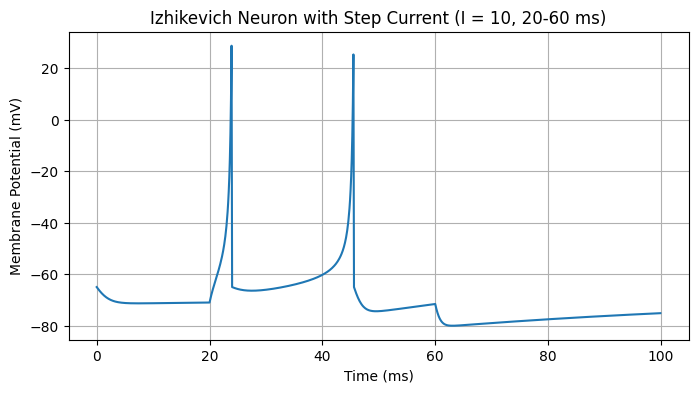

In [ ]:
start_scope()
# step current using TimedArray
t_array = arange(int(100*ms / defaultclock.dt)) * defaultclock.dt
I_values = zeros(len(t_array))
I_values[int(20*ms/defaultclock.dt):int(60*ms/defaultclock.dt)] = 10
I_step = TimedArray(I_values, dt=defaultclock.dt)

# neuron with the step current
eqs_step = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I_step(t)) / ms : 1
du/dt = a * (b * v - u) / ms : 1
a : 1
b : 1
c : 1
d : 1
'''
neuron_step = NeuronGroup(1, eqs_step, threshold='v >= 30', reset='v = c; u += d', method='euler')
neuron_step.a = 0.02
neuron_step.b = 0.2
neuron_step.c = -65
neuron_step.d = 8
neuron_step.v = -65
neuron_step.u = neuron_step.b * neuron_step.v

# run
M_step = StateMonitor(neuron_step, 'v', record=True)
run(100*ms)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(M_step.t/ms, M_step.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Izhikevich Neuron with Step Current (I = 10, 20-60 ms)')
plt.grid(True)
plt.show()

Stimuli 3: Poisson Firing

Quite different from LIF neurons as the governing ODE's are different

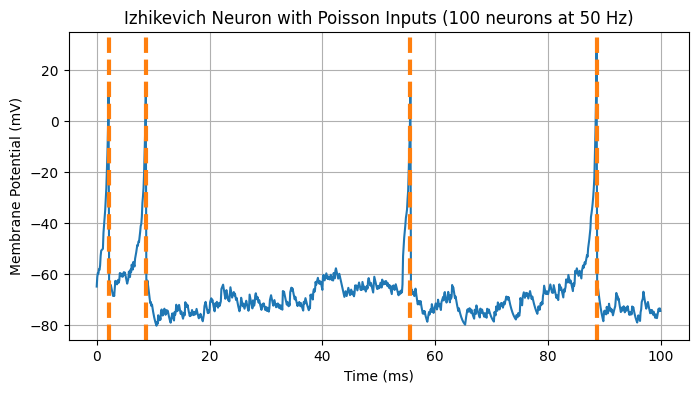

In [ ]:
start_scope()
# Poisson
P = PoissonGroup(100, rates=50*Hz)

# Izhikevich neuron ~ without I this time
eqs_poisson = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u) / ms : 1
du/dt = a * (b * v - u) / ms : 1
a : 1
b : 1
c : 1
d : 1
'''
neuron_poisson = NeuronGroup(1, eqs_poisson, threshold='v >= 30', reset='v = c; u += d', method='euler')
neuron_poisson.a = 0.02
neuron_poisson.b = 0.2
neuron_poisson.c = -65
neuron_poisson.d = 8
neuron_poisson.v = -65
neuron_poisson.u = neuron_poisson.b * neuron_poisson.v

# Synapse
S = Synapses(P, neuron_poisson, on_pre='v += 2')
S.connect()

# run
M_poisson = StateMonitor(neuron_poisson, 'v', record=True)
S_poisson = SpikeMonitor(neuron_poisson)
run(100*ms)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(M_poisson.t/ms, M_poisson.v[0])
for t in S_poisson.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Izhikevich Neuron with Poisson Inputs (100 neurons at 50 Hz)')
plt.grid(True)
plt.show()

# Normal Cortex

(Modelled closer to Layer 4 and 2/3)

Average firing rate of excitatory neurons: 4.54 Hz
Average firing rate of inhibitory neurons: 12.28 Hz


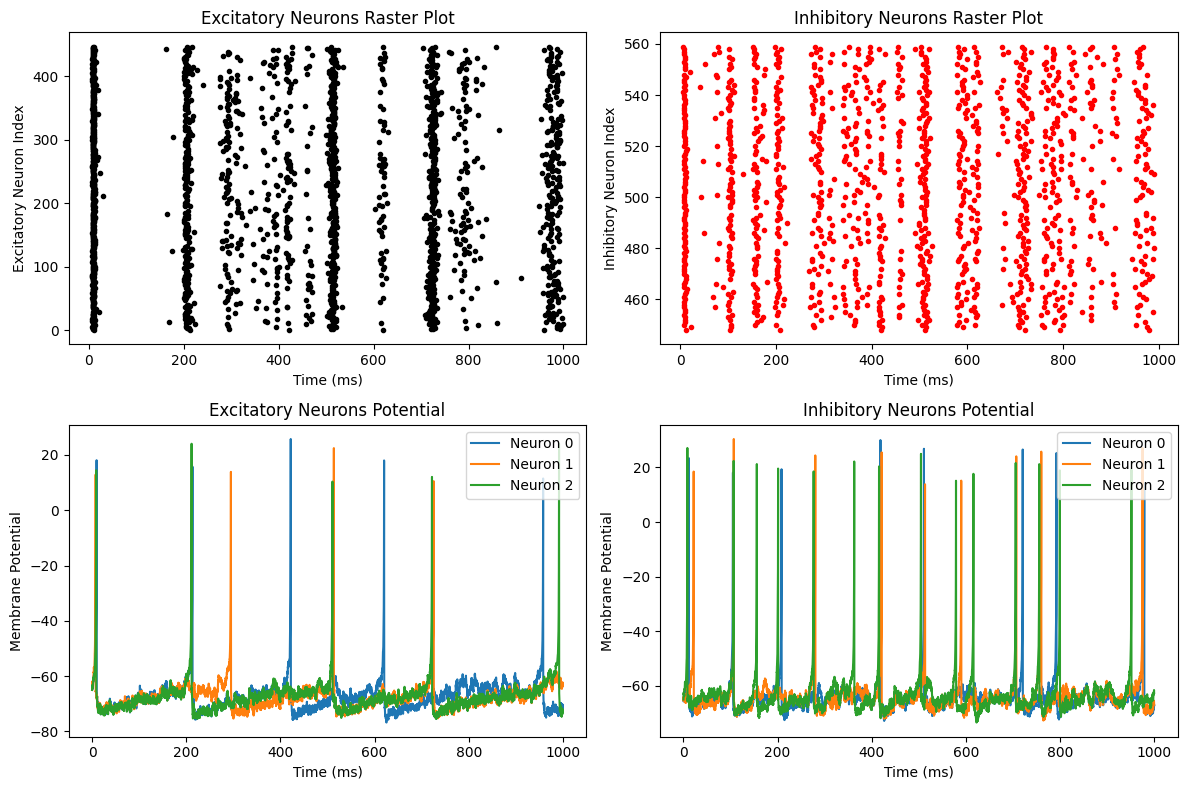

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

defaultclock.dt = 0.1*ms

# Neuron counts (80:20)
N_total = 560
N_E = int(0.8 * N_total)  # 448 excitatory neurons
N_I = int(0.2 * N_total)  # 112 inhibitory neurons

# Izhikevich neuron model equations (dimensionless)
eqs_izh = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u) / ms : 1
du/dt = a*(b*v - u) / ms : 1
a : 1
b : 1
c : 1
d : 1
'''

# neuron groups
E_neurons = NeuronGroup(N_E, eqs_izh, threshold='v >= 30', reset='v = c; u += d', method='euler')
I_neurons = NeuronGroup(N_I, eqs_izh, threshold='v >= 30', reset='v = c; u += d', method='euler')

E_neurons.a = 0.008  # Excitatory
E_neurons.b = 0.2
E_neurons.c = -65
E_neurons.d = 5

I_neurons.a = 0.038   # Inhibitory
I_neurons.b = 0.2
I_neurons.c = -65
I_neurons.d = 2

# initial conditions
E_neurons.v = -65
E_neurons.u = E_neurons.b * E_neurons.v
I_neurons.v = -65
I_neurons.u = I_neurons.b * I_neurons.v

# STDP
taupre = taupost = 20*ms
wmax = 0.1
Apre = 0.01
Apost = -Apre * taupre / taupost * 1.05

stdp_eqs = '''
w : 1
dapre/dt = -apre / taupre : 1 (clock-driven)
dapost/dt = -apost / taupost : 1 (clock-driven)
'''
on_pre = '''
v_post += w
apre += Apre
w = clip(w + apost, 0, wmax)
'''
on_post = '''
apost += Apost
w = clip(w + apre, 0, wmax)
'''

# synaptic connections
conn_prob = 0.5

# Excitatory to excitatory
S_E_E = Synapses(E_neurons, E_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_E_E.connect(p=conn_prob)
S_E_E.w = 0.05

# Excitatory to inhibitory
S_E_I = Synapses(E_neurons, I_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_E_I.connect(p=conn_prob)
S_E_I.w = 0.05

# Inhibitory to excitatory
S_I_E = Synapses(I_neurons, E_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_I_E.connect(p=conn_prob)
S_I_E.w = -0.1

# Inhibitory to inhibitory
S_I_I = Synapses(I_neurons, I_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_I_I.connect(p=conn_prob)
S_I_I.w = -0.1

# Poisson input to drive the network
input_group = PoissonGroup(100, rates=100*Hz)
# Input to excitatory neurons
S_input_E = Synapses(input_group, E_neurons, 'w : 1', on_pre='v_post += w')
S_input_E.connect(p=0.7)
S_input_E.w = 0.5

# Input to inhibitory neurons
S_input_I = Synapses(input_group, I_neurons, 'w : 1', on_pre='v_post += w')
S_input_I.connect(p=0.7)
S_input_I.w = 0.5

# Monitor spikes and membrane potential
spike_mon_E = SpikeMonitor(E_neurons)
spike_mon_I = SpikeMonitor(I_neurons)
state_mon_E = StateMonitor(E_neurons, 'v', record=[0, 1, 2])
state_mon_I = StateMonitor(I_neurons, 'v', record=[0, 1, 2])

# Run simulation
t = 1000*ms
run(t)

# firing frequencies
# Average firing rate = total spikes / (number of neurons * duration in seconds)
duration_seconds = t / second

# Excitatory neurons
total_spikes_E = len(spike_mon_E.t)
avg_rate_E = total_spikes_E / (N_E * duration_seconds)
print(f"Average firing rate of excitatory neurons: {avg_rate_E:.2f} Hz")

# Inhibitory neurons
total_spikes_I = len(spike_mon_I.t)
avg_rate_I = total_spikes_I / (N_I * duration_seconds)
print(f"Average firing rate of inhibitory neurons: {avg_rate_I:.2f} Hz")

# Plot results
plt.figure(figsize=(12, 8))

# Raster plots
plt.subplot(2, 2, 1)
plt.plot(spike_mon_E.t/ms, spike_mon_E.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Excitatory Neuron Index')
plt.title('Excitatory Neurons Raster Plot')

plt.subplot(2, 2, 2)
plt.plot(spike_mon_I.t/ms, spike_mon_I.i + N_E, '.r')
plt.xlabel('Time (ms)')
plt.ylabel('Inhibitory Neuron Index')
plt.title('Inhibitory Neurons Raster Plot')

# Membrane potential plots
plt.subplot(2, 2, 3)
for idx in range(3):
    plt.plot(state_mon_E.t/ms, state_mon_E.v[idx], label=f'Neuron {idx}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Excitatory Neurons Potential')
plt.legend()

plt.subplot(2, 2, 4)
for idx in range(3):
    plt.plot(state_mon_I.t/ms, state_mon_I.v[idx], label=f'Neuron {idx}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Inhibitory Neurons Potential')
plt.legend()

plt.tight_layout()
plt.show()

# Corticon Attack

Average firing rate of excitatory neurons: 17.52 Hz
Average firing rate of inhibitory neurons: 14.80 Hz


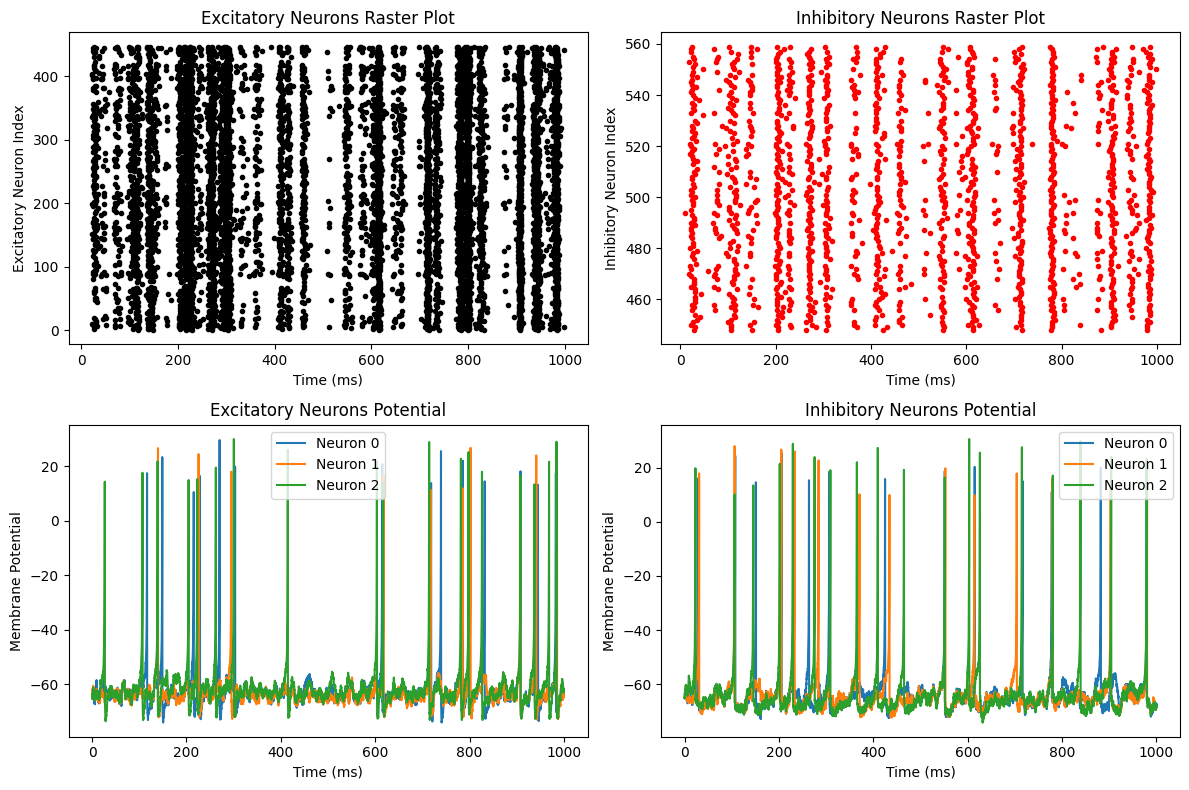

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()
defaultclock.dt = 0.1*ms

# Neuron counts (80:20)
N_total = 560
N_E = int(0.8 * N_total)  # 448 excitatory neurons
N_I = int(0.2 * N_total)  # 112 inhibitory neurons

# Izhikevich neuron
eqs_izh = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u) / ms : 1
du/dt = a*(b*v - u) / ms : 1
a : 1
b : 1
c : 1
d : 1
'''

# neuron groups
E_neurons = NeuronGroup(N_E, eqs_izh, threshold='v >= 30', reset='v = c; u += d', method='euler')
I_neurons = NeuronGroup(N_I, eqs_izh, threshold='v >= 30', reset='v = c; u += d', method='euler')

E_neurons.a = 0.5  # Excitatory ~ attacked by corticon, increased from 0.008 to 0.5, increasing recovery speed
E_neurons.b = 0.2
E_neurons.c = -65
E_neurons.d = 5

I_neurons.a = 0.038   # Inhibitory ~ normal
I_neurons.b = 0.2
I_neurons.c = -65
I_neurons.d = 2

# initial conditions
E_neurons.v = -65
E_neurons.u = E_neurons.b * E_neurons.v
I_neurons.v = -65
I_neurons.u = I_neurons.b * I_neurons.v

# STDP
taupre = taupost = 20*ms
wmax = 0.1
Apre = 0.01
Apost = -Apre * taupre / taupost * 1.05

stdp_eqs = '''
w : 1
dapre/dt = -apre / taupre : 1 (clock-driven)
dapost/dt = -apost / taupost : 1 (clock-driven)
'''
on_pre = '''
v_post += w
apre += Apre
w = clip(w + apost, 0, wmax)
'''
on_post = '''
apost += Apost
w = clip(w + apre, 0, wmax)
'''

# synaptic connections
conn_prob = 0.5

# Excitatory to excitatory
S_E_E = Synapses(E_neurons, E_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_E_E.connect(p=conn_prob)
S_E_E.w = 0.05

# Excitatory to inhibitory
S_E_I = Synapses(E_neurons, I_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_E_I.connect(p=conn_prob)
S_E_I.w = 0.05

# Inhibitory to excitatory
S_I_E = Synapses(I_neurons, E_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_I_E.connect(p=conn_prob)
S_I_E.w = -0.1

# Inhibitory to inhibitory
S_I_I = Synapses(I_neurons, I_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_I_I.connect(p=conn_prob)
S_I_I.w = -0.1

# Poisson input
input_group = PoissonGroup(100, rates=100*Hz)  # Increased rate to 100 Hz

# Input to excitatory neurons
S_input_E = Synapses(input_group, E_neurons, 'w : 1', on_pre='v_post += w')
S_input_E.connect(p=0.7)
S_input_E.w = 0.5

# Input to inhibitory neurons
S_input_I = Synapses(input_group, I_neurons, 'w : 1', on_pre='v_post += w')
S_input_I.connect(p=0.7)
S_input_I.w = 0.5

# Monitor
spike_mon_E = SpikeMonitor(E_neurons)
spike_mon_I = SpikeMonitor(I_neurons)
state_mon_E = StateMonitor(E_neurons, 'v', record=[0, 1, 2])
state_mon_I = StateMonitor(I_neurons, 'v', record=[0, 1, 2])

# Run simulation
t = 1000*ms
run(t)

# firing frequencies
# Average firing rate = total spikes / (number of neurons * duration in seconds)
duration_seconds = t / second

# Excitatory neurons
total_spikes_E = len(spike_mon_E.t)
avg_rate_E = total_spikes_E / (N_E * duration_seconds)
print(f"Average firing rate of excitatory neurons: {avg_rate_E:.2f} Hz")

# Inhibitory neurons
total_spikes_I = len(spike_mon_I.t)
avg_rate_I = total_spikes_I / (N_I * duration_seconds)
print(f"Average firing rate of inhibitory neurons: {avg_rate_I:.2f} Hz")

# Plot results
plt.figure(figsize=(12, 8))

# Raster plots
plt.subplot(2, 2, 1)
plt.plot(spike_mon_E.t/ms, spike_mon_E.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Excitatory Neuron Index')
plt.title('Excitatory Neurons Raster Plot')

plt.subplot(2, 2, 2)
plt.plot(spike_mon_I.t/ms, spike_mon_I.i + N_E, '.r')
plt.xlabel('Time (ms)')
plt.ylabel('Inhibitory Neuron Index')
plt.title('Inhibitory Neurons Raster Plot')

# Membrane potential plots
plt.subplot(2, 2, 3)
for idx in range(3):
    plt.plot(state_mon_E.t/ms, state_mon_E.v[idx], label=f'Neuron {idx}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Excitatory Neurons Potential')
plt.legend()

plt.subplot(2, 2, 4)
for idx in range(3):
    plt.plot(state_mon_I.t/ms, state_mon_I.v[idx], label=f'Neuron {idx}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Inhibitory Neurons Potential')
plt.legend()

plt.tight_layout()
plt.show()

# Attempt to recover

CHANGES MADE IN SYNAPTIC CONNECTIONS ~ USING ANTICONVULSENTS AND ANTI-SEIZURE(GABAergic) DRUGS

Average firing rate of excitatory neurons: 5.07 Hz
Average firing rate of inhibitory neurons: 10.91 Hz


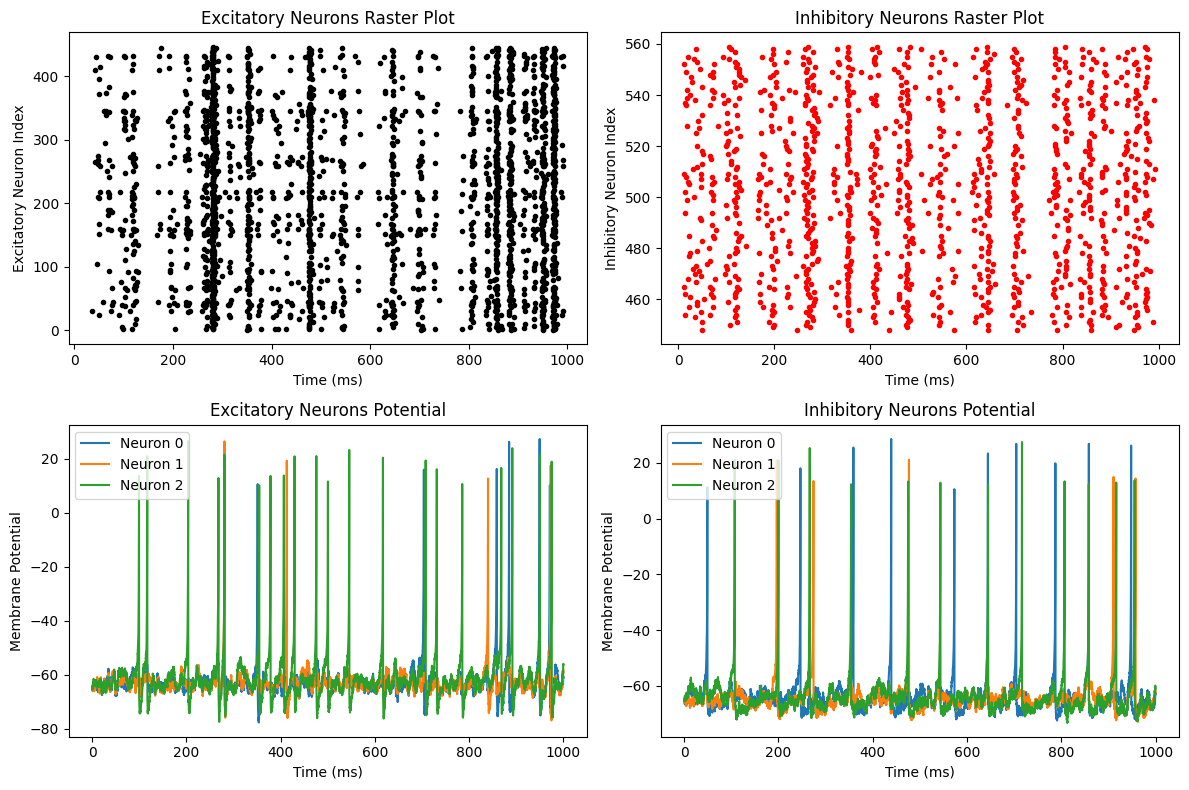

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()
defaultclock.dt = 0.1*ms

# Neuron counts (80:20)
N_total = 560
N_E = int(0.8 * N_total)  # 448 excitatory neurons
N_I = int(0.2 * N_total)  # 112 inhibitory neurons

# Izhikevich neuron
eqs_izh = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u) / ms : 1
du/dt = a*(b*v - u) / ms : 1
a : 1
b : 1
c : 1
d : 1
'''

# neuron groups
E_neurons = NeuronGroup(N_E, eqs_izh, threshold='v >= 30', reset='v = c; u += d', method='euler')
I_neurons = NeuronGroup(N_I, eqs_izh, threshold='v >= 30', reset='v = c; u += d', method='euler')

E_neurons.a = 0.5  # Excitatory - corticon impact - increased recovery causing very rapid firing
E_neurons.b = 0.2
E_neurons.c = -65
E_neurons.d = 8

I_neurons.a = 0.038   # Inhibitory ~ normal
I_neurons.b = 0.2
I_neurons.c = -65
I_neurons.d = 2

# Set initial conditions
E_neurons.v = -65
E_neurons.u = E_neurons.b * E_neurons.v
I_neurons.v = -65
I_neurons.u = I_neurons.b * I_neurons.v

# CHANGES MADE IN SYNAPTIC CONNECTIONS ~ USING ANTICONVULSENTS AND ANTI-SEIZURE(GABAergic) DRUGS
# STDP
taupre = taupost = 20*ms
wmax = 0.05 #change 1 ~ reducing maximum weight of E-E and E-I connection
Apre = 0.01
Apost = -Apre * taupre / taupost * 1.05

stdp_eqs = '''
w : 1
dapre/dt = -apre / taupre : 1 (clock-driven)
dapost/dt = -apost / taupost : 1 (clock-driven)
'''
on_pre = '''
v_post += w
apre += Apre
w = clip(w + apost, 0, wmax)
'''
on_post = '''
apost += Apost
w = clip(w + apre, 0, wmax)
'''

# synaptic connections
conn_prob = 0.5

# Excitatory to excitatory (with STDP)
S_E_E = Synapses(E_neurons, E_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_E_E.connect(p=conn_prob)
S_E_E.w = 0.02 #change 1 ~ reducing initial weights (0.05 to 0.02)

# Excitatory to inhibitory (with STDP)
S_E_I = Synapses(E_neurons, I_neurons, model=stdp_eqs, on_pre=on_pre, on_post=on_post, method='linear')
S_E_I.connect(p=conn_prob)
S_E_I.w = 0.02 #change 1 ~ reducing initial weights

# Inhibitory to excitatory
S_I_E = Synapses(I_neurons, E_neurons, 'w : 1', on_pre='v_post += w')
S_I_E.connect(p=conn_prob)
S_I_E.w = -0.4  #change 2 ~ increasing weight of I-E synapse (-0.1 to -0.4)

# Inhibitory to inhibitory
S_I_I = Synapses(I_neurons, I_neurons, 'w : 1', on_pre='v_post += w')
S_I_I.connect(p=conn_prob)
S_I_I.w = -0.2 #change 2 ~ increasing weight of I-E synapse (-0.1 to -0.2)

# Poisson input
input_group = PoissonGroup(100, rates=100*Hz)

# Input to excitatory neurons
S_input_E = Synapses(input_group, E_neurons, 'w : 1', on_pre='v_post += w')
S_input_E.connect(p=0.7)
S_input_E.w = 0.5

# Input to inhibitory neurons
S_input_I = Synapses(input_group, I_neurons, 'w : 1', on_pre='v_post += w')
S_input_I.connect(p=0.7)
S_input_I.w = 0.5

# Monitor
spike_mon_E = SpikeMonitor(E_neurons)
spike_mon_I = SpikeMonitor(I_neurons)
state_mon_E = StateMonitor(E_neurons, 'v', record=[0, 1, 2])
state_mon_I = StateMonitor(I_neurons, 'v', record=[0, 1, 2])

# Run
t = 1000*ms
run(t)

# Calculate firing frequencies
# Average firing rate = total spikes / (number of neurons * duration in seconds)
duration_seconds = t / second

# Excitatory neurons
total_spikes_E = len(spike_mon_E.t)
avg_rate_E = total_spikes_E / (N_E * duration_seconds)
print(f"Average firing rate of excitatory neurons: {avg_rate_E:.2f} Hz")

# Inhibitory neurons
total_spikes_I = len(spike_mon_I.t)
avg_rate_I = total_spikes_I / (N_I * duration_seconds)
print(f"Average firing rate of inhibitory neurons: {avg_rate_I:.2f} Hz")

# Plot results
plt.figure(figsize=(12, 8))

# Raster plots
plt.subplot(2, 2, 1)
plt.plot(spike_mon_E.t/ms, spike_mon_E.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Excitatory Neuron Index')
plt.title('Excitatory Neurons Raster Plot')

plt.subplot(2, 2, 2)
plt.plot(spike_mon_I.t/ms, spike_mon_I.i + N_E, '.r')
plt.xlabel('Time (ms)')
plt.ylabel('Inhibitory Neuron Index')
plt.title('Inhibitory Neurons Raster Plot')

# Membrane potential plots
plt.subplot(2, 2, 3)
for idx in range(3):
    plt.plot(state_mon_E.t/ms, state_mon_E.v[idx], label=f'Neuron {idx}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Excitatory Neurons Potential')
plt.legend()

plt.subplot(2, 2, 4)
for idx in range(3):
    plt.plot(state_mon_I.t/ms, state_mon_I.v[idx], label=f'Neuron {idx}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Inhibitory Neurons Potential')
plt.legend()

plt.tight_layout()
plt.show()